<a href="https://colab.research.google.com/github/TheMasterEngine/data/blob/master/Tarea_2_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.upla.cl/normasgraficas/wp-content/uploads/2016/01/logo_upla.png" title="Title text" width="35%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> CIF 8458 Ingeniería del Conocimiento II-2020 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales y Aprendizaje No supervisado </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient y Skip Connections
* Learn Rate Decay
* Optimizadores
* Aprendizaje No Supervisado


** Formalidades **  
* Se debe realizar un jupyter notebook con los pasos, descripciones, análisis y conclusiones.
* La tarea es individual, la copia parcial o total será penalizada con nota 1.
* La entrega de la tarea se realizará en el sistema <em>eaula </em> (se debe adjuntar el archivo .ipynb).
* Fecha de Entrega: Domingo 6 de Diciembre, 23:00 horas. 
* El sistema no aceptarán tareas con retraso.
* Debe estar preparad@ para presentar su tarea en horario a determinar. 
* La Nota del informe se calcula: $\left(\frac{\mbox{suma de puntos obtenidos}*6}{50}\right)+1$

<hr style="height:2px;border:none"/>

**Uso de google colab**
Se recomienda el uso de google colab para evitar usar los recursos de su computador local.

**Paquetes instalación**
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de anaconda (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como sklearn, una librería simple y de facil acceso para data science, keras en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como backend TensorFlow o Theano, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de computer science como numpy, matplotlib, pandas, además de claramente jupyter.

Descargar anaconda

Luego de instalar Anaconda y tenerla en el path de su computador crear un entorno virtual:

conda create -n redesneuronales python=version
con version, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 (es decir, python = 3) debido a dependencias con una de las librerías a utilizar.

Acceder al ambiente creado

source activate redesneuronales
Instalar los paquetes a utilizar

conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu
(Si no tienen gpu instalan los paquetes keras y tensorflow en luegar de keras-gpu y tensorflow-gpu)

Para salir del entorno
source deactivate redesneuronales


**Observaciones**
La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. 

# 1 - Redes Feed Forward para predecir la resistencia a la compresión del hormigón

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa estan conectadas a todos los inputs y envian su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient_ y el _exploding gradient_, viendo también algunos optimizadores existentes. 

Para realizar esto, utilizaremos una base de datos con información para determinar la resistencia a la compresión del hormigón (material muy importante para la construcciones, más para nosotros que vivimos en una zona sísmica), la cual se encuentra en el repositorio de datos de la Universidad de California, Irvine, en la siguiente URL: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength. El dataset cuenta con 1030 registros, donde podemos encontrar la edad del hormigón y la información de sus ingredientes. 
Nuesta tarea durante esta pregunta será predecir la resistencia a la compresión del hormigón.

<img src="https://civildigital.com/wp-content/uploads/2016/07/Compressive-Strength-test-for-M25-Concrete.jpg" title="Title text" width="35%" height="20%" />

### 1.a Carga de datos y primeros analisis
(1 pto) Cargue los datos en un _dataframe_ como muestra el código. Explore superficialmente los datos utilizando los metodos `.head`, `.describe` o `.info` del _DataFrame_ y comente.

In [1]:
import pandas as pd

df_tr = pd.read_excel("/Concrete_Data.xls")

In [2]:
df_tr.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df_tr.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [4]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

### 1.b Estandarización y Train Test Split
(2 pts) En esta pregunta nos ocuparemos de separar el _dataset_ en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular las funciones `StandarScaler` y `train_test_split`.

Para esto separe primero el dataset en $X$ e $Y$. Luego separe los datos considerando un $70\%$ de ellos para entrenamiento, un $20\%$ para validación y un $10\%$ para test. Finalmente ajuste los _scalers_ con los datos de entrenamiento y transforme los datos. 

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 
- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 
- ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_tr.iloc[:,:8]
Y = df_tr.iloc[:,8:]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
scaler_x.fit(x_train)
x_tr = scaler_x.transform(x_train)
x_val = scaler_x.transform(x_val)

In [12]:
x_tr

array([[ 0.45140328, -0.83668212, -0.83402418, ...,  0.07193045,
         0.59771934, -0.70412355],
       [-0.0570179 ,  0.30014216, -0.45199409, ...,  1.13174551,
         0.07672177, -0.51430013],
       [ 1.36317885, -0.28465643, -0.83402418, ..., -0.51052465,
        -2.231393  , -0.63509685],
       ...,
       [-0.3139213 , -0.83668212,  0.66051626, ..., -0.29653571,
         0.99208045,  0.21048019],
       [ 0.62147541, -0.83668212, -0.83402418, ...,  0.94561312,
         0.36502178, -0.27270669],
       [ 0.52699089, -0.83668212, -0.83402418, ..., -0.05469022,
         0.0588408 ,  0.79720712]])

### 1.c Primera Red
(6 pts) En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciaran estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Mean Square Error_ para obtener resultados comparables entre distintos modelos. Para entrenar esta red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_. 

* Construya la red basandose en el código y la documentación de keras. 

In [13]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

ANN = Sequential()

# Hidden Layer
ANN.add(
    Dense(
        units = 256, 
        activation = 'relu',
        input_dim=8
    )
)

# Output Layer
ANN.add(
    Dense(
       units = 1 # dimension of Output... ,
        # no need for activation (i.e. linear activation) considering the range of the output... 
       )
)
ANN.compile(
    optimizer=SGD(learning_rate = 0.002),
    loss='mse')

Una forma fácil de instanciar la red es la propuesta en el codigo abajo, es decir entrenar la red por 0 _epochs_. Una red instanciada nos permite utilizar el método `.summary` para ver su número de parametros y los tamaños de cada capa. 

* Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros?

In [14]:
ANN.fit(x_tr, y_train, epochs=0)
ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


* Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

* Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

In [15]:
history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
24/24 [==============================] - 0s 7ms/step - loss: 857.0161 - val_loss: 162.7132
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 155.2067 - val_loss: 135.8682
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 137.1997 - val_loss: 122.7175
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 123.6087 - val_loss: 130.1542
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 122.5641 - val_loss: 125.3424
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 117.7532 - val_loss: 103.6297
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 114.4449 - val_loss: 111.5675
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 113.0274 - val_loss: 110.2456
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 110.5923 - val_loss: 122.7270
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 111.4833 

In [16]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


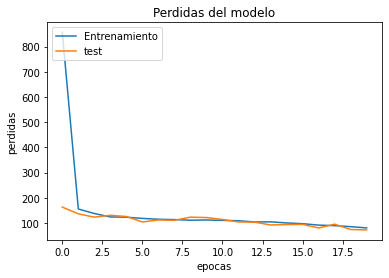

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

* Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos dos valores mayores y dos valores menores al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _calback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

* Grafique el comportamiento de los errores de validación y entrenamiento para a lo menos un valor mayor y uno menor al original y comente.

In [18]:
import matplotlib.pyplot as plt
from keras.callbacks import TerminateOnNaN
terminate = TerminateOnNaN()

def neurona(lr):
  ANN = Sequential()

  # Hidden Layer
  ANN.add(
      Dense(
          units = 256, 
          activation = 'relu',
          input_dim=8
      )
  )

  # Output Layer
  ANN.add(
      Dense(
        units = 1 # dimension of Output... ,
          # no need for activation (i.e. linear activation) considering the range of the output... 
        )
  )
  ANN.compile(
    optimizer=SGD(learning_rate = lr),
    loss='mse')
  
  history = ANN.fit(x_tr, 
                  y_train, 
                  epochs=20, 
                  validation_data=(x_val,y_val),
                  callbacks=[terminate]
    )
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'test'], loc='upper left')
  plt.show()

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 565.2225 - val_loss: 345.1927
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 466.6522 - val_loss: 977.8174
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 279.6370 - val_loss: 125.8269
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 213.4050 - val_loss: 568.5204
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 261.2356 - val_loss: 182.4987
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 119.7189 - val_loss: 147.9872
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 152.6342 - val_loss: 1071.7594
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 250.0751 - val_loss: 141.8958
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 103.4532 - val_loss: 716.7553
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - loss: 320.6548

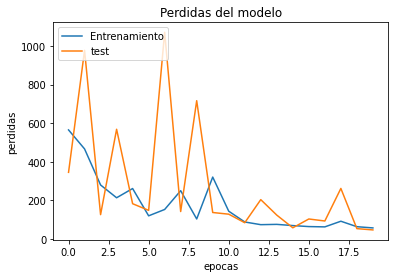

In [19]:
neurona(0.02)

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 332.4125 - val_loss: 277.1974
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 156.3080 - val_loss: 125.0866
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 134.4553 - val_loss: 130.5004
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 150.1013 - val_loss: 161.1263
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 132.0886 - val_loss: 102.5820
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 150.2171 - val_loss: 108.1321
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 116.2119 - val_loss: 68.5636
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 79.7524 - val_loss: 189.4115
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 114.1360 - val_loss: 70.2358
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 109.0472 - v

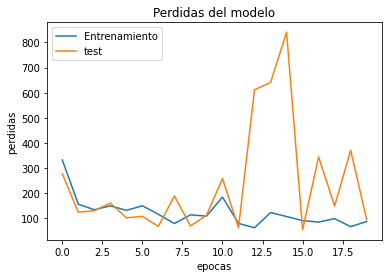

In [20]:
neurona(0.01)

Epoch 1/20
24/24 [==============================] - 0s 6ms/step - loss: 1584.2466 - val_loss: 1599.1459
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 1584.2404 - val_loss: 1599.1393
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 1584.2340 - val_loss: 1599.1329
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 1584.2283 - val_loss: 1599.1262
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 1584.2214 - val_loss: 1599.1196
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 1584.2152 - val_loss: 1599.1133
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 1584.2089 - val_loss: 1599.1066
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 1584.2024 - val_loss: 1599.1000
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 1584.1964 - val_loss: 1599.0933
Epoch 10/20
24/24 [==============================] - 0s 2ms/step

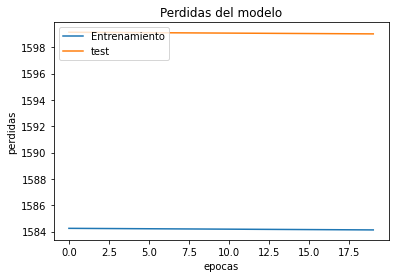

In [21]:
neurona(0.00000001)

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 1562.9171 - val_loss: 1573.8557
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 1557.6481 - val_loss: 1568.4191
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 1552.4214 - val_loss: 1562.9961
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 1547.2086 - val_loss: 1557.4724
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 1541.8994 - val_loss: 1551.9634
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 1536.6050 - val_loss: 1546.5433
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 1531.3921 - val_loss: 1541.0549
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 1526.1169 - val_loss: 1535.6545
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 1520.9188 - val_loss: 1530.1741
Epoch 10/20
24/24 [==============================] - 0s 2ms/step

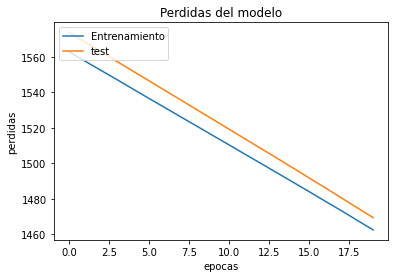

In [22]:
neurona(0.000009)

### 1.d Activación y regularizadores $l$1 $l$2
(4 pts) En esta pregunta se les propone explorar distintas funciones de activación o de regularización usual. Por lo extenso de la tarea se les propone elegir una de las dos exploraciones. En ambos casos deben entrenar la misma red entrenada anteriormente utilizando gradiente descendente con algun _learn rate_ que les parezca adecuado luego de la exploración en la pregunta anterior. 

* En caso de elegir explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, _softmax_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 

* En caso de elegir explorar las funciones de regularización usual, agregue regularización $l$1 o $l$2 a la capa oculta y pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

**Independiente de la opción elegida**, comente sobre los siguientes temas:

* ¿Cual es el interés de tener activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta? ¿Qué pasaría si usaramos esta activación en la capa de salida? 

* ¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones. 

In [ ]:
# activations
from keras.layers import LeakyReLU
model.add(Dense( # . . . ))
model.add(LeakyReLU())
    
# regularizer
from keras.regularizers import l1, l2
model.add(
    Dense( # . . .
          activity_regularizer=l2(0.001)
         )
)

In [29]:
from keras.layers import LeakyReLU

def leakyRelu(alfa):
  ANN = Sequential()

  # Hidden Layer
  ANN.add(
      Dense(
          units = 256,
          input_dim=8
      )
  )
  ANN.add(
      LeakyReLU(alpha=alfa)
  )
  # Output Layer
  ANN.add(
      Dense(
        units = 1 # dimension of Output... ,
          # no need for activation (i.e. linear activation) considering the range of the output... 
        )
  )
  ANN.compile(
      optimizer=SGD(learning_rate = 0.0008),
      loss='mse')

  history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val))

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'test'], loc='upper left')
  plt.show()

In [30]:
def activation(tipo): 
  ANN = Sequential()

  # Hidden Layer
  ANN.add(
      Dense(
          units = 256, 
          activation = tipo,
          input_dim=8
      )
  )

  # Output Layer
  ANN.add(
      Dense(
        units = 1 # dimension of Output... ,
          # no need for activation (i.e. linear activation) considering the range of the output... 
        )
  )
  ANN.compile(
      optimizer=SGD(learning_rate = 0.0008),
      loss='mse')

  history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val))

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'test'], loc='upper left')
  plt.show()

Epoch 1/20
24/24 [==============================] - 0s 6ms/step - loss: 1356.1388 - val_loss: 995.1264
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 601.2105 - val_loss: 225.0538
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 183.1985 - val_loss: 136.3881
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 146.1773 - val_loss: 126.4929
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 136.2177 - val_loss: 123.4036
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 131.2257 - val_loss: 121.2749
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 127.3784 - val_loss: 114.5560
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 123.6962 - val_loss: 112.1233
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 121.3078 - val_loss: 111.7962
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 119.1448

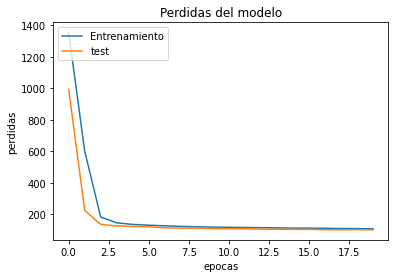

In [31]:
leakyRelu(0.0005)

Epoch 1/20
24/24 [==============================] - 0s 6ms/step - loss: 1526.0477 - val_loss: 1488.2334
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 1432.9342 - val_loss: 1398.0441
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 1346.3250 - val_loss: 1315.2255
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 1266.8424 - val_loss: 1239.0441
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 1193.7400 - val_loss: 1168.6769
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 1126.2360 - val_loss: 1103.9355
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 1064.1093 - val_loss: 1043.8613
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 1006.5053 - val_loss: 988.2016
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 953.1398 - val_loss: 935.4850
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - 

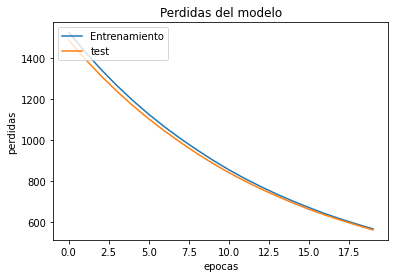

In [32]:
activation('softmax')

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 1395.5410 - val_loss: 1087.3346
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 655.0380 - val_loss: 238.5208
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 158.3671 - val_loss: 107.1375
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 111.6366 - val_loss: 95.7741
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 104.2579 - val_loss: 89.8795
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 100.5890 - val_loss: 85.8793
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 97.7863 - val_loss: 83.2270
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 94.5978 - val_loss: 79.2764
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 91.3896 - val_loss: 75.4188
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 88.5607 - val_lo

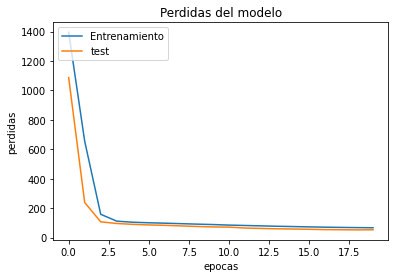

In [33]:
activation('tanh')

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 538.1899 - val_loss: 279.1792
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 264.3839 - val_loss: 250.9672
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 245.9203 - val_loss: 235.3932
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 231.2834 - val_loss: 220.2862
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 217.0151 - val_loss: 207.6129
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 206.0330 - val_loss: 197.2578
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 195.6469 - val_loss: 187.5260
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 186.6379 - val_loss: 176.1878
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 177.6514 - val_loss: 167.7269
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 170.0753 

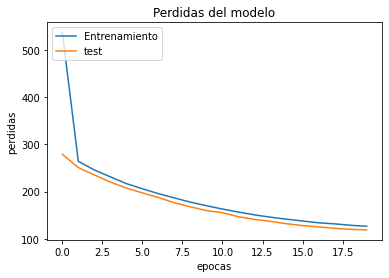

In [34]:
activation('sigmoid')

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 1353.1494 - val_loss: 939.3147
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 488.9006 - val_loss: 136.3072
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 127.7954 - val_loss: 113.6845
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 118.1444 - val_loss: 109.4399
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 116.8528 - val_loss: 108.5534
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 116.1117 - val_loss: 108.0749
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 115.3680 - val_loss: 105.2273
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 114.0129 - val_loss: 109.4520
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 113.9099 - val_loss: 107.3463
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 114.6519

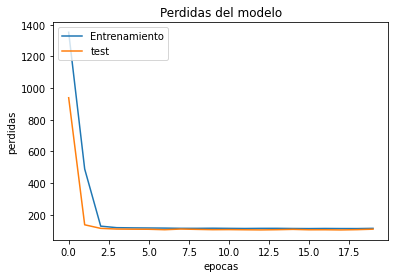

In [35]:
activation('linear')

### 1.e Exploración del Número de neuronas

(3 pts) Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrenen la red que estimen conveniente luego de la pregunta anterior, variando el numero de nuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

In [36]:
import numpy as np

train_error, val_error = [], []

for n_units in range(1,11):# . . . 
    
  # do model
  ANN = Sequential()

  ANN.add(
      Dense(
          units = pow(n_units, 2), 
          activation = 'relu',
          input_dim=8
      )
  )
  ANN.add(
      Dense(
        units = 1 # dimension of Output... ,
          # no need for activation (i.e. linear activation) considering the range of the output... 
        )
  )
  ANN.compile(
      optimizer=SGD(learning_rate = 0.001),
      loss='mse')
  # train model 
  history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val))

  val_error = val_error+[min(history.history['val_loss'])]
  train_error = train_error+[history.history['loss'][np.argmin(history.history['val_loss'])]]
  # for instance
    
# . . . .

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 1529.1674 - val_loss: 1468.0677
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 1403.4719 - val_loss: 1359.8535
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 1300.8331 - val_loss: 1261.1677
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 1206.9498 - val_loss: 1171.8754
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 1122.0007 - val_loss: 1090.4861
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 1044.6149 - val_loss: 1017.6007
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 975.2966 - val_loss: 950.6256
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 911.6447 - val_loss: 888.5825
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 852.6870 - val_loss: 833.1984
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - los

In [39]:
val_error

[475.44512939453125,
 99.91510009765625,
 99.45921325683594,
 99.5958480834961,
 100.61415100097656,
 96.23016357421875,
 96.89258575439453,
 100.12346649169922,
 99.21905517578125,
 97.7255859375]

In [40]:
train_error

[479.7637634277344,
 108.73035430908203,
 107.48808288574219,
 109.78804779052734,
 108.7638931274414,
 106.0806884765625,
 105.17839050292969,
 107.30107116699219,
 107.65182495117188,
 105.92280578613281]

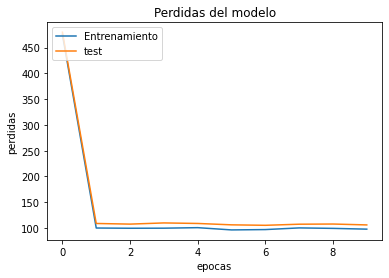

In [41]:
  plt.plot(val_error)
  plt.plot(train_error)
  plt.title('Perdidas del modelo')
  plt.ylabel('perdidas')
  plt.xlabel('epocas')
  plt.legend(['Entrenamiento', 'test'], loc='upper left')
  plt.show()

### 1.f Dropout
(3 pts) Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

Epoch 1/200
24/24 [==============================] - 0s 5ms/step - loss: 476.2319 - val_loss: 140.6153
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 156.7857 - val_loss: 167.3796
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 150.3182 - val_loss: 125.9403
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 141.3364 - val_loss: 178.6447
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 143.6731 - val_loss: 179.0911
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 147.5160 - val_loss: 108.6381
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 126.4964 - val_loss: 171.2718
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 127.0343 - val_loss: 100.2357
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 119.7888 - val_loss: 89.0248
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 

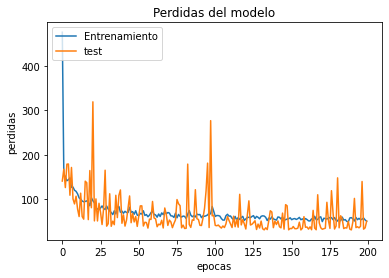

In [46]:
from keras.layers import Dropout

ANN = Sequential()

ANN.add(
    Dense(
        units = 200, 
        activation = 'relu',
        input_dim=8
    )
)
ANN.add(
    Dropout(0.5)
)
ANN.add(
    Dense(
      units = 1 # dimension of Output... ,
        # no need for activation (i.e. linear activation) considering the range of the output... 
      )
)
ANN.compile(
    optimizer=SGD(learning_rate = 0.005),
    loss='mse')
# train model 
history = ANN.fit(x_tr, y_train, epochs=200, validation_data=(x_val,y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

### 1.g Extreme Learning Machine

(2 pts) Otra aproximación para obtener modelos grandes que no sobreajustan es la implementada por _ELM_. Explique en qué consiste la idea de _ELM_ y porqué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros. 

Entrene una _ELM_ de una capa fija y una capa oculta, la primera con un número relativamente grande y la segunda con un número relativamente pequeño. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes. 

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

In [47]:
# . . . 
ANN = Sequential()
ANN.add(
    Dense(units=5000,
          activation='relu',
          input_dim=8
        )
)

ANN.add(
    Dense(units=32, 
          activation='relu'
        )
)

ANN.add(Dense(1))

ANN.layers[0].trainable = False

ANN.compile(
    optimizer=SGD(learning_rate = 0.002),
    loss='mse')
# . . . 

In [48]:
ANN.fit(x_tr, y_train, epochs=0)
ANN.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 5000)              45000     
_________________________________________________________________
dense_49 (Dense)             (None, 32)                160032    
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 205,065
Trainable params: 160,065
Non-trainable params: 45,000
_________________________________________________________________


### 1.h Learning Rate Decay
(3 pts) Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 876.6251 - val_loss: 156.5644
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 153.9709 - val_loss: 130.4206
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 130.1732 - val_loss: 129.0718
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 127.1062 - val_loss: 108.7168
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 119.2870 - val_loss: 114.5179
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 118.3887 - val_loss: 113.0534
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 114.2506 - val_loss: 117.7376
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 112.2136 - val_loss: 104.4356
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 110.2422 - val_loss: 103.4257
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 107.1469 

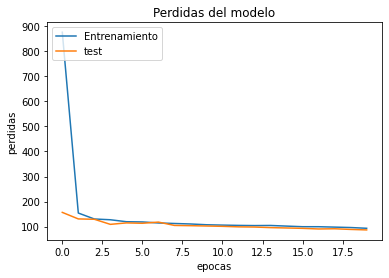

In [50]:
from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
  initial_lrate = 0.002
  drop = 0.5
  epochs_drop = 10.0
  lr = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))

  if lr > (5 * math.pow(10, -5)):
    return lr
  else:
    lr = 5 * math.pow(10, -5)
    return lr

schedule = LearningRateScheduler(step_decay)

# model. # . . . 
ANN = Sequential()
ANN.add(
    Dense(units=256,
          activation='relu',
          input_dim=8
        )
)

ANN.add(
    Dense(units=1
          )
)

ANN.compile(
    optimizer=SGD(learning_rate = 0.002),
    loss='mse')

history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val), callbacks=[schedule])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

### 1.i Vanishing Gradient

(4 pts) El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

In [191]:
ANN = Sequential()

# Hidden Layer
ANN.add(Dense(units = 256, activation = 'relu',input_dim=8))
ANN.add(Dense(units = 256, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
# Output Layer
ANN.add(Dense(units = 1))
ANN.compile(optimizer=SGD(learning_rate = 0.00005),loss='mse')

In [192]:
def pesos(text):
  for i in range(len(ANN.layers)):
    layer_kernel_weights = ANN.get_layer(index=i).get_weights()[0]
    layer_bias_weight = ANN.get_layer(index=i).get_weights()[1]

  plt.title(text)
  plt.hist(layer_kernel_weights, bins = 10, alpha=1, edgecolor = 'black',  linewidth=1)
  plt.show()

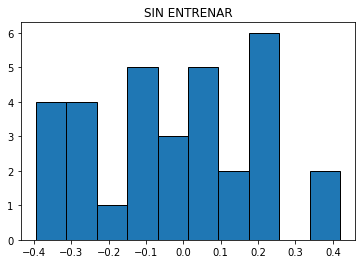

In [193]:
pesos('SIN ENTRENAR')

In [194]:
history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
24/24 [==============================] - 0s 8ms/step - loss: 1564.7548 - val_loss: 1568.3767
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 1546.4164 - val_loss: 1550.1984
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 1527.0023 - val_loss: 1527.3125
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 1500.5083 - val_loss: 1493.0697
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 1455.8485 - val_loss: 1425.4220
Epoch 6/20
24/24 [==============================] - 0s 4ms/step - loss: 1345.1022 - val_loss: 1207.2026
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 834.5618 - val_loss: 267.1009
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 227.1824 - val_loss: 184.7032
Epoch 9/20
24/24 [==============================] - 0s 3ms/step - loss: 196.5905 - val_loss: 196.3597
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - los

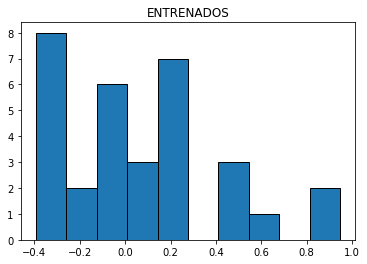

In [195]:
pesos('ENTRENADOS')

In [196]:
from keras.initializers import glorot_uniform
ANN = Sequential()

initializer = glorot_uniform()
# Hidden Layer
ANN.add(Dense(units = 256, activation = 'relu',input_dim=8, kernel_initializer=initializer))
ANN.add(Dense(units = 256, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 128, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
ANN.add(Dense(units = 32, activation = 'relu',))
# Output Layer
ANN.add(Dense(units = 1))
ANN.compile(optimizer=SGD(learning_rate = 0.0001),loss='mse')

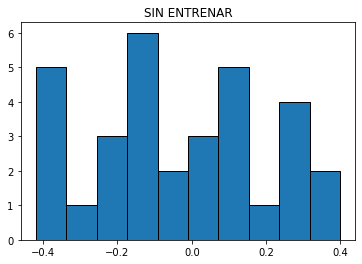

In [197]:
pesos('SIN ENTRENAR')

In [198]:
history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
24/24 [==============================] - 0s 7ms/step - loss: 1563.1300 - val_loss: 1562.1514
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 1533.1365 - val_loss: 1527.7970
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 1488.2769 - val_loss: 1458.7695
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 1317.6561 - val_loss: 879.6107
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 329.1838 - val_loss: 195.4535
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 193.2125 - val_loss: 163.3926
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 172.2008 - val_loss: 150.1010
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 152.1728 - val_loss: 138.0159
Epoch 9/20
24/24 [==============================] - 0s 3ms/step - loss: 137.6567 - val_loss: 128.3350
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - loss: 12

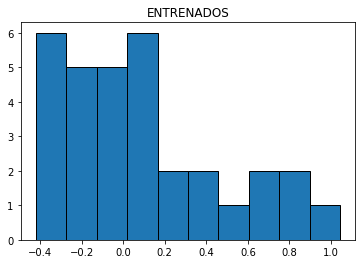

In [199]:
pesos('ENTRENADOS')

### 1.j Otros Optimizadores

(3 pts) Finalmente, utilizando la estructura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente vainilla. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros) o modificar los parámetros que no hemos utilizado del gradiente descendente (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento, la velocidad de convergencia y el desempeño final alcanzado. Apoyese de gráficos. 

In [211]:
ANN = Sequential()

# Hidden Layer
ANN.add(Dense(units = 256, activation = 'relu', input_dim=8))
# Output Layer
ANN.add(Dense(units = 1))

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 36.3764 - val_loss: 41.8290
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 36.3749 - val_loss: 35.1303
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 35.6973 - val_loss: 44.6468
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 34.9155 - val_loss: 37.2622
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 34.1820 - val_loss: 35.4887
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 35.3923 - val_loss: 39.0790
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 34.8261 - val_loss: 37.1792
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 36.0070 - val_loss: 46.1527
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 34.4943 - val_loss: 36.1244
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 33.2678 - val_loss: 35.5725

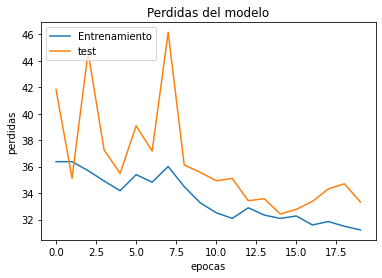

In [217]:
from keras.optimizers import SGD
ANN.compile(optimizer=SGD(learning_rate = 0.002), loss='mse')

history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val), callbacks=[schedule])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 32.7168 - val_loss: 34.7745
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 31.4486 - val_loss: 32.6098
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 31.7854 - val_loss: 34.5725
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 31.4957 - val_loss: 36.3172
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 31.5849 - val_loss: 32.5645
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 31.2302 - val_loss: 32.3530
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 30.9611 - val_loss: 32.2036
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 30.8279 - val_loss: 33.1376
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 30.7391 - val_loss: 31.7204
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 30.0183 - val_loss: 32.4994

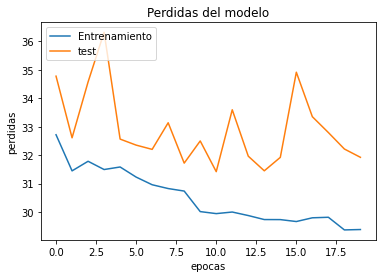

In [218]:
from keras.optimizers import RMSprop
ANN.compile(optimizer=RMSprop(learning_rate = 0.002), loss='mse')

history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val), callbacks=[schedule])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

Epoch 1/20
24/24 [==============================] - 0s 6ms/step - loss: 28.9909 - val_loss: 30.3994
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 28.0401 - val_loss: 31.7996
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 27.7175 - val_loss: 30.7963
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 27.7841 - val_loss: 31.2439
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 28.3051 - val_loss: 30.5085
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 27.9627 - val_loss: 30.6439
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 27.7601 - val_loss: 30.0236
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 27.5839 - val_loss: 30.4581
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 27.4341 - val_loss: 30.2000
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 26.9604 - val_loss: 29.5801

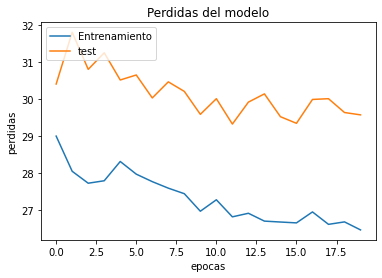

In [220]:
from keras.optimizers import Adam
ANN.compile(optimizer=Adam(learning_rate=0.002), loss='mse')

history = ANN.fit(x_tr, y_train, epochs=20, validation_data=(x_val,y_val), callbacks=[schedule])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

### 1.k Testing 

(4 pts) Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error cuadrático medio de la predicción realizada sobre el _Test set_. Para puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? Si su curiosidad es suficiente, puede calcular el error real de su modelo transformando nuevamente el _target_ y su predicción a la escala original (utilizando su `scaler`) y tranformando a precio aplicando exponenciación (pues Y estaba espresado en escala logaritmica).

In [225]:
prediccion = ANN.predict(x_test)

In [231]:
np.argmax(prediccion)

91

In [232]:
print(prediccion[91])

[17141.979]


 <a id="segundo"></a>
# 2. Clasificando granos de trigo usando Aprendizaje No Supervisado

En esta sección utilizaremos el dataset Seeds que contiene información de mediciones de propiedades geométricas de granos de trigo pertenecientes a tres variedades: Kama, Rosa y Canadian. Para estudiar la estructura interna del grano se utilizó una técnica de rayos X de baja energía. Para ver en detalle la descripción de la semántica asociada a los atributos de este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/seeds.


<img src="https://i2.wp.com/pakchinanews.pk/wp-content/uploads/2017/11/Wheat-e1511163298450.png?fit=560%2C315" title="Title text" width="40%"/>

### 2.a) Carga de Datos

(1 pto) Construya un dataframe con los datos a analizar. 

```python
import pandas as pd

url = 'seeds_dataset.csv'
df = pd.read_csv(url, sep=',',header=None, names=['AREA', 'PER', 'COMP', 'LEN', 'WID', 'ASYM', 'LGR','CLASS'])

```

Describa brevemente el dataset utilizar.

```python
df.info()
df.describe()
```

In [257]:
import pandas as pd
 
url = '/seeds_dataset.csv'
df = pd.read_csv(url, sep=',',header=None, names=['AREA', 'PER', 'COMP', 'LEN', 'WID', 'ASYM', 'LGR','CLASS']) 

In [258]:
df

,,AREA,PER,COMP,LEN,WID,ASYM,LGR,CLASS
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0,NaN,NaN
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0,NaN,NaN
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0,NaN,NaN
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0,NaN,NaN
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0,NaN,NaN
11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0,NaN,NaN
13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0,NaN,NaN
11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0,NaN,NaN


### 2.b) Preprocesamiento

(2 pts) Normalice los datos antes de trabajar. ¿Es necesario separar  los datos en entrenamiento y test?

```python
from sklearn.preprocessing import StandardScaler
targets = df.pop('CLASS')
scaler = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(scaler, columns=df.columns)
```

In [259]:
from sklearn.preprocessing import StandardScaler
targets = df.pop('CLASS')
scaler = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(scaler, columns=df.columns)
df_scaled = df_scaled.fillna(0)

In [260]:
df_scaled

,AREA,PER,COMP,LEN,WID,ASYM,LGR
0,-0.012031,0.277320,0.072952,-0.987249,-0.353138,-1.146031,0.0
1,0.422388,-0.013816,0.123083,-1.793794,-0.850279,-1.146031,0.0
2,1.450368,-0.380173,0.132632,-0.666777,-1.096966,-1.146031,0.0
3,1.041756,-0.334204,0.232894,-0.961772,-1.134629,-1.146031,0.0
4,1.381549,0.131056,0.669751,-1.567854,-0.437878,-1.146031,0.0
...,...,...,...,...,...,...,...
205,0.301955,-0.594694,-0.717210,-0.041923,-1.012227,0.968341,0.0
206,-0.867964,-0.590515,-1.161228,0.423366,-0.761773,0.968341,0.0
207,0.732072,-0.456788,-0.118023,3.098439,-0.661968,0.968341,0.0
208,-0.824952,-0.541761,-1.063353,-0.064047,-0.684565,0.968341,0.0


### 2.c) Clustering

(2 pts) Clusterice los datos usando K-means, con el objetivo de clasificar el tipo de grano.

```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=, random_state=0)
clusters = kmeans.fit_predict()
```

In [261]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

In [262]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### 2.d) Etiquetados vía clustering

(2 pts) Etiquete cada cluster con la etiqueta correspondiente. Explique que hace el siguiente código.

```python
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]
```

### 2.e) Cálculo del desempeño

(2 pts) Calcule el accuracy de la clasificación

### 2.f) Matriz de confusión

(2 pts) Muestre la matriz de confusión. Comente

```python
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(targets, labels)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
```

### 2.g) Mezcla de Gaussianas

(2 pts) Clusterice los datos usando Mezcla de gaussianas, con el objetivo de clasificar el tipo de grano. Repita los pasos d) al g) usando este algoritmo. Compare con k-means y comente.

```python
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(df_scaled)
clusters = gmm.predict(df_scaled)
```

### 2.i) Manifold

(2 pts) Proyecte los datos usando el método de manifold TSNE. Compare k-means y mezcla de gaussianas usando esta proyección. ¿La proyección mejora los resultados?
Comente.

```python
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
data_proj = tsne.fit_transform(df_scaled)
```